In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from kneed import KneeLocator

In [2]:
df=pd.read_excel(r'C:\Users\id_anm\OneDrive - BTG Group\Documents\Python File\Data Penjualan fintecth abc.xlsx')

In [3]:
df.head()

,User ID,Order ID,Date Applied,Status,University,Year,Type of Product,Ecom,Purchase,Voucher Code,Price,DP,Installment,Time Period,Total Interest,H
0,ID3887926535,ID9009548356,2021-01-01 00:00:00,rejected,Universitas Brawijaya - Malang,2015,BARANG,tokopedia,INFINIX HOT 9 PLAY 4/64,NaN,1643888,164389,165926,12,511613,NaN
1,ID2933497385,ID6943014286,2021-01-01 00:00:00,approved,Institut Teknologi Sepuluh Nopember (ITS),2018,BARANG,tokopedia,GOPRO HERO 8 BLACK BUNDLE,NaN,5549000,3856530,200000,12,707530,NaN
2,ID3560325924,ID9967181294,2021-01-01 00:00:00,rejected,Universitas Muhammadiyah Malang (UMM),2018,BARANG,tokopedia,XIAOMI REDMI NOTE 9 PRO,NaN,3539000,550000,327598,12,942176,NaN
3,ID3560325924,ID0299851630,2021-01-01 00:00:00,approved,Universitas Muhammadiyah Malang (UMM),2018,PULSA,NaN,"TELKOMSEL RP 100,000",NaN,98147,0,100001,1,1854,NaN
4,ID3560325924,ID6277673608,2021-01-01 00:00:00,approved,Universitas Muhammadiyah Malang (UMM),2018,PULSA,NaN,"TELKOMSEL RP 100,000",NaN,98147,0,100001,1,1854,NaN


In [4]:
df.tail(3)

,User ID,Order ID,Date Applied,Status,University,Year,Type of Product,Ecom,Purchase,Voucher Code,Price,DP,Installment,Time Period,Total Interest,H
4443,ID9446582467,ID2101977098,2021-07-31 00:00:00,rejected,Universitas Airlangga (UNAIR),2019,BARANG,tokopedia,IPHONE 12 PRO 128GB -,APX50,15800000,6320000,793939,17,4016963,NaN
4444,ID2816155652,ID5751106708,2021-07-31 00:00:00,rejected,Universitas Islam Negeri Sayyid Ali Rahmatulla...,2020,BARANG,tokopedia,POCO M3 6/128GB - MI,MIE50,2275000,227500,226507,3,-1367979,NaN
4445,user_id,order_id,date_applied,status,university,start_year,product,ecom,purchase,voucher_code,price,downpayment,installment,time_period,Keuntungan,NaN


In [5]:
# DATA CLEANSING

In [6]:
df.drop(columns={'User ID','Order ID','Date Applied','University','Year','Purchase','Voucher Code','H', 'Total Interest'}, inplace=True) 
#Drop some column as it is not neccessary and column H as it it blank

In [7]:
df.drop(labels=4445, axis=0, inplace=True)
#drop last row

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445 entries, 0 to 4444
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Status           4445 non-null   object
 1   Type of Product  4445 non-null   object
 2   Ecom             3109 non-null   object
 3   Price            4445 non-null   object
 4   DP               4445 non-null   object
 5   Installment      4445 non-null   object
 6   Time Period      4445 non-null   object
dtypes: object(7)
memory usage: 277.8+ KB


In [10]:
#Check if there is any null
df.isnull().sum()

Status                0
Type of Product       0
Ecom               1336
Price                 0
DP                    0
Installment           0
Time Period           0
dtype: int64

In [11]:
mask=df['Ecom'].isnull()
df.loc[mask, 'Ecom'] = df.loc[mask, 'Type of Product'].map({'UANG KULIAH':'NOT Ecom','PULSA':'NOT Ecom','BARANG':'Other Ecom'})
#Fill missing value in Ecom

In [12]:
#Create a copy of df for machine learning
df_kmeans=df

In [13]:
df_kmeans.head()

,Status,Type of Product,Ecom,Price,DP,Installment,Time Period
0,rejected,BARANG,tokopedia,1643888,164389,165926,12
1,approved,BARANG,tokopedia,5549000,3856530,200000,12
2,rejected,BARANG,tokopedia,3539000,550000,327598,12
3,approved,PULSA,NOT Ecom,98147,0,100001,1
4,approved,PULSA,NOT Ecom,98147,0,100001,1


In [20]:
#Check Each Item in Type of Product
df_kmeans['Status'].value_counts()

approved    2170
rejected    1773
Name: Status, dtype: int64

In [19]:
# Drop Rows that has 'Cancelled' in status column
df_kmeans = df_kmeans[df_kmeans.Status != 'cancelled']

In [17]:
# assign new value for approve=1, rejected=2, cancelled=3

# df_kmeans["Status"].replace({"approved": 1 , "rejected": 2, "cancelled":3}, regex=True, inplace=True)

In [21]:
#Check Each Item in Type of Product
df_kmeans['Type of Product'].value_counts()

BARANG         2665
PULSA          1023
UANG KULIAH     255
Name: Type of Product, dtype: int64

In [22]:
# assign new value for BARANG = 1, PULSA=2 and UANG KULIAH =3

df_kmeans["Type of Product"].replace({"BARANG": 1 , "PULSA": 2, "UANG KULIAH":3}, regex=True, inplace=True)


C:\Users\id_anm\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
#Check Each Item in Ecom and drop rows that only occure less than 10 times

In [24]:
Ecom_counts = df_kmeans[['Ecom', 'Type of Product']]
df_kmeans= df_kmeans[Ecom_counts.replace(Ecom_counts.apply(pd.Series.value_counts)).gt(10).all(1)]

In [25]:
df_kmeans['Ecom'].value_counts()

tokopedia    1925
NOT Ecom     1278
shopee        484
bukalapak      55
lazada         42
jd             29
bhinneka       21
eraspace       17
zalora         15
blibli         14
Name: Ecom, dtype: int64

In [26]:
# assign new value for tokopedia=1, NOT Ecom=2, shopee=3, bukalapak=4, lazada=5, jd=6, bhinneka=7, eraspace=8, zalora=9, blibli=10

df_kmeans["Ecom"].replace({"tokopedia": 1 , "NOT Ecom": 2, "shopee" : 3, "bukalapak" : 4, "lazada":5,
                       "jd" :6, "bhinneka":7, "eraspace" : 8, "zalora":9, "blibli":10}, regex=True, inplace=True)


In [27]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3880 entries, 0 to 4444
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Status           3880 non-null   object
 1   Type of Product  3880 non-null   int64 
 2   Ecom             3880 non-null   int64 
 3   Price            3880 non-null   object
 4   DP               3880 non-null   object
 5   Installment      3880 non-null   object
 6   Time Period      3880 non-null   object
dtypes: int64(2), object(5)
memory usage: 242.5+ KB


In [30]:
# Change Dataset to float type
# df_kmeans['Status'] = df_kmeans['Status'].astype('float')
df_kmeans['Price'] = df_kmeans['Price'].astype('float')
df_kmeans['DP'] = df_kmeans['DP'].astype('float')
df_kmeans['Installment'] = df_kmeans['Installment'].astype('float')
df_kmeans['Time Period'] = df_kmeans['Time Period'].astype('float')

In [31]:
# MACHINE LEARNING USING K-MEANS

In [32]:
#Train
df_train,df_test = train_test_split(df_kmeans,test_size=0.2,random_state=123)

In [33]:
X_train = df_train.drop(columns='Status')
y_train = df_train['Status']

In [34]:
X_test = df_test.drop(columns='Status')
y_test = df_test['Status']

In [35]:
def elbow_plot_kmeans(X,kmax,step=1):
  '''
  Function for K-Means elbow plot
  
  kmax is maximum number of k
  step is looping step for testing kmeans
  '''  
  WCSS=[]
  for i in range(1,kmax,step):
    kmeans=KMeans(n_clusters=i,random_state=123,verbose=False)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
  plt.plot(range(1,kmax,step),WCSS,marker='o')
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Total Distance')
  plt.xlim([0,kmax])
  plt.show()

In [36]:
def plot_kmeans(X,k):
  '''
  Function for visualizing K-Means Results
  '''

  kmeans = KMeans(n_clusters=k ,random_state=123,verbose=False)
  y = kmeans.fit(X)

  if X.shape[1] > 2: 
    if X.shape[1] == 3:
      df_pca = X.copy()
    else:
      # Apply Principal Component Analysis for Visualization Purpose
      pca = PCA(n_components=3)
      df_pca = pca.fit_transform(X)
      df_pca = pd.DataFrame(df_pca,columns=['pca_1','pca_2','pca_3'])
      
    fig=plt.figure(figsize=(12,8))
    ax=plt.axes(projection="3d")
    scatter=ax.scatter3D(df_pca.iloc[:,0],df_pca.iloc[:,1],df_pca.iloc[:,2],c=y.labels_)
    plt.colorbar(scatter)
    plt.title(str(k)+'-Means Clustering')
    plt.show()
  else:
    scatter=plt.scatter(X,c=y.labels_)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.title(str(k)+'-Means Clustering')
    plt.show()

In [55]:
#  Normalize all of the features 

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

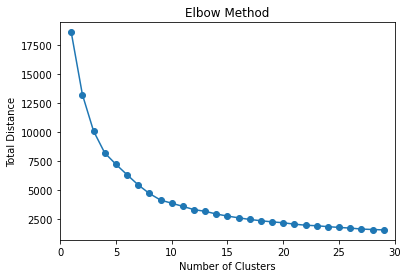

In [38]:
elbow_plot_kmeans(X_train_scaled,kmax=30)

In [40]:
#kl = KneeLocator(range(1, 30), WCSS, curve="convex", direction="decreasing")

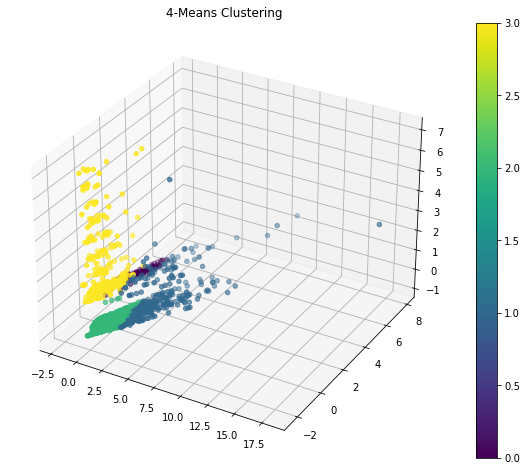

In [54]:
plot_kmeans(X_train_scaled,k=4)

In [42]:
kmeans = KMeans(n_clusters=8 ,random_state=123,verbose=False)
kmeans.fit(X_train_scaled)

segment_train = kmeans.predict(X_train_scaled)
segment_test = kmeans.predict(X_test_scaled)

In [44]:
X_train_segmented = X_train.copy()
X_train_segmented['segment'] = segment_train

X_test_segmented = X_test.copy()
X_test_segmented['segment'] = segment_test

In [45]:
X_train_segmented

,Type of Product,Ecom,Price,DP,Installment,Time Period,segment
4080,2,2,98147.0,0.0,100001.0,1.0,0
4300,2,2,196294.0,0.0,200001.0,1.0,0
3916,2,2,98147.0,0.0,100001.0,1.0,0
2337,1,1,2400000.0,300000.0,150227.0,22.0,1
2474,2,2,147220.0,0.0,150000.0,1.0,0
...,...,...,...,...,...,...,...
1309,1,3,250000.0,47500.0,50647.0,6.0,5
1563,1,1,7599000.0,1899750.0,376992.0,24.0,1
3966,1,1,880000.0,450000.0,263193.0,2.0,3
3947,2,2,25518.0,0.0,26000.0,1.0,0


In [46]:
#################################

In [47]:
# Initiate the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=123,
                             criterion='entropy',
                             max_depth = 5)

In [48]:
# Train the model on training data
model = clf.fit(X_train_segmented, y_train)

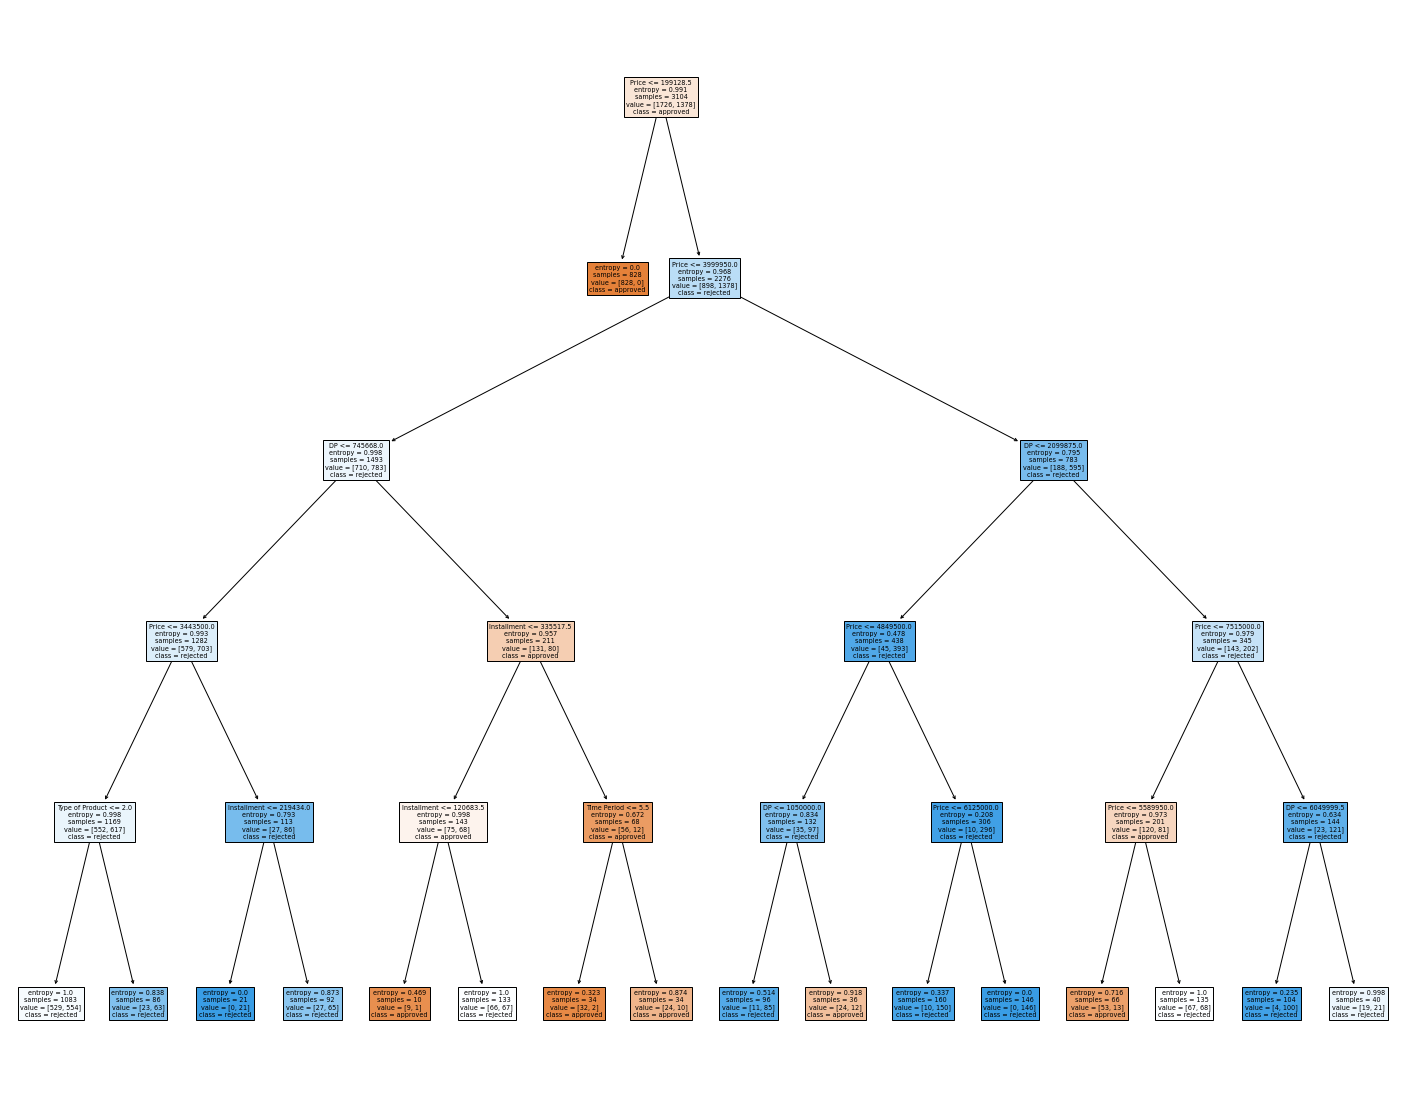

In [52]:
# Visualize the Decision Tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train_segmented.columns,
                   class_names=['approved','rejected'],
                   filled=True)

In [50]:
# Test the model performance on testing data
clf.score(X_test_segmented, y_test) #method to calculate mean accuracy

0.7255154639175257

In [51]:
# What if we want to calculate other metrics as well?

y_pred = clf.predict(X_test_segmented)

print(classification_report(y_test, y_pred, target_names=['approved','rejected',]))

              precision    recall  f1-score   support

    approved       0.94      0.54      0.69       431
    rejected       0.63      0.95      0.76       345

    accuracy                           0.73       776
   macro avg       0.78      0.75      0.72       776
weighted avg       0.80      0.73      0.72       776

